In [29]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))

from src.markov_matrix import crear_matriz_probabilidad
from src.markov_matrix import calcular_distribucion_metodo_sistema
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Análisis de Tiempos: Variando n (tamaño de la cadena) y P la probabilidad

In [ ]:
# Crear un grid para n de 1 en 1 hasta 1000
max_n = 1000
fixed_interval_p = 0.1
grid_n = np.arange(1, max_n)
grid_p = np.arange(0.1, 1, fixed_interval_p)
tiempos_n = []

In [31]:
# Crear matriz para almacenar los tiempos
# Filas: valores de p, Columnas: valores de n
matriz_tiempos = np.zeros((len(grid_p), len(grid_n)))

# Llenar la matriz con los tiempos medidos
for i, p in enumerate(grid_p):
    for j, n in enumerate(grid_n):
        # Crear matriz
        matriz = crear_matriz_probabilidad(n, p)
        
        # Medir tiempo de ejecución
        start_time = time.time()
        pi = calcular_distribucion_metodo_sistema(matriz)
        tiempo = time.time() - start_time
        
        # Guardar en la matriz
        matriz_tiempos[i, j] = tiempo
        

# Convertir a DataFrame para mejor visualización
df_tiempos = pd.DataFrame(matriz_tiempos, 
                         index=[f'p={p:.1f}' for p in grid_p],
                         columns=[f'n={n}' for n in grid_n])


KeyboardInterrupt: 

## Resumen de Resultados del Método 2

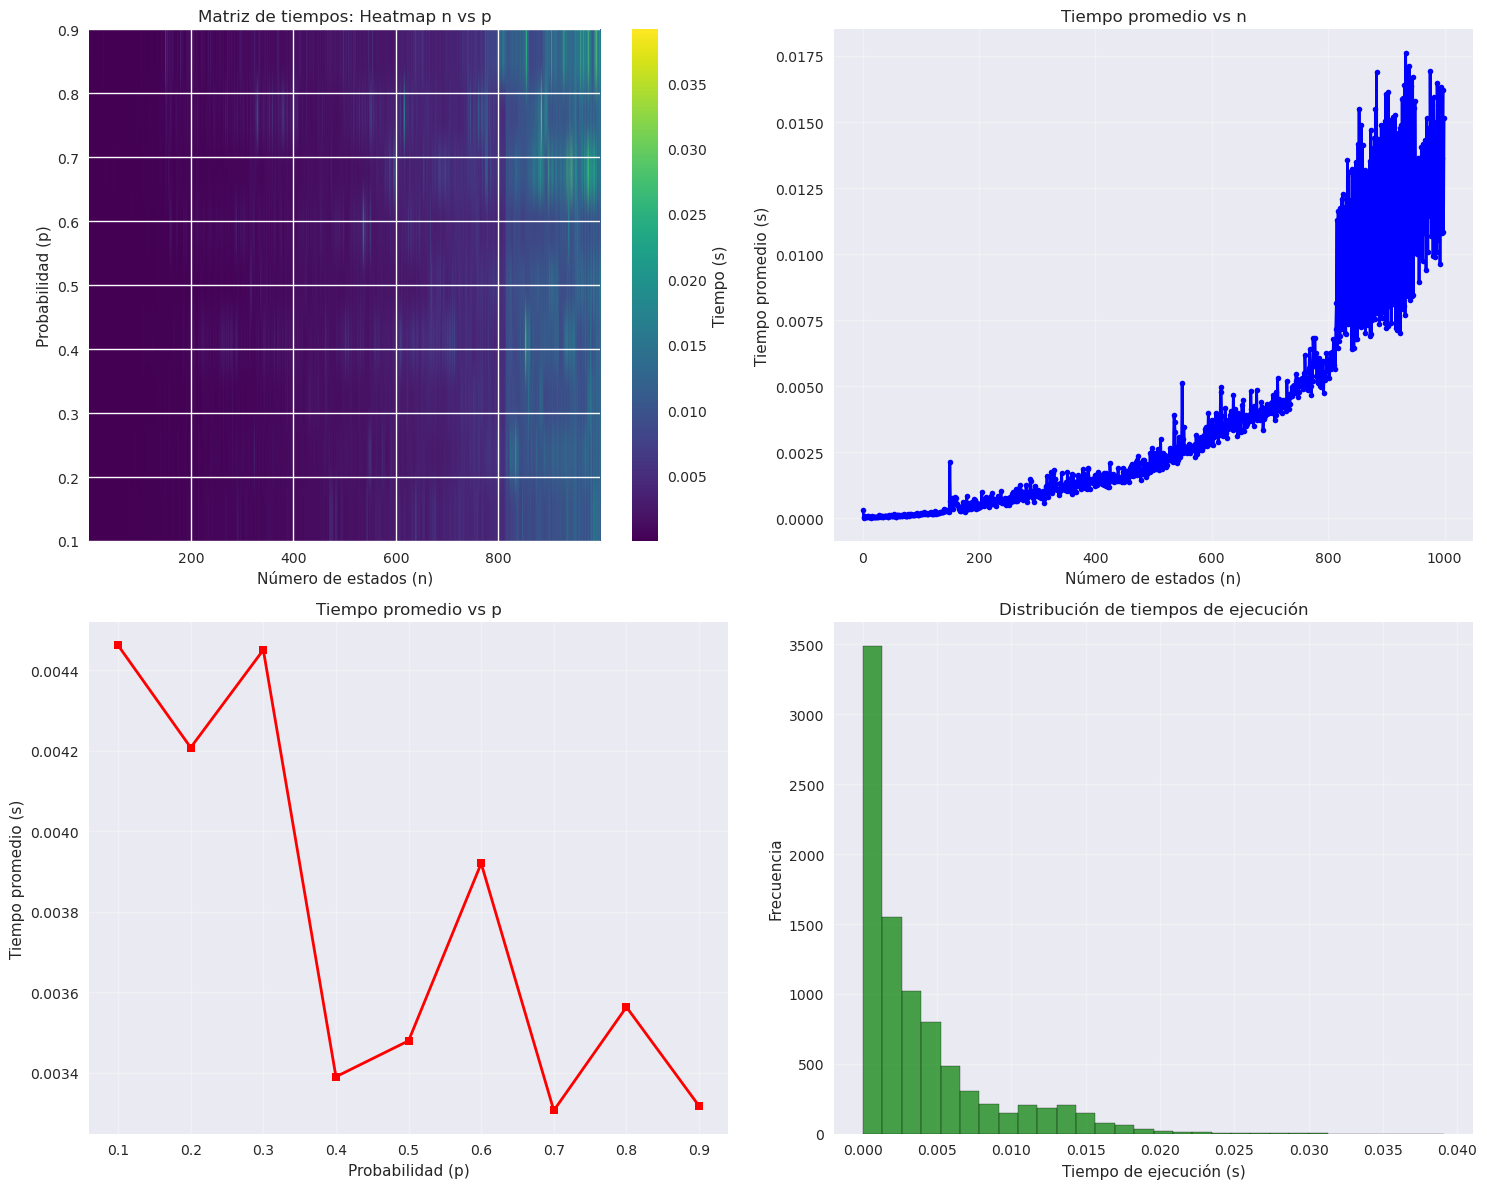


Estadísticas de la matriz de tiempos:
• Forma de la matriz: (9, 999)
• Tiempo mínimo: 0.000014 s
• Tiempo máximo: 0.039109 s
• Tiempo promedio: 0.003789 s
• Desviación estándar: 0.004516 s

Matriz guardada en: matriz_tiempos_sistema_lineal.csv


In [ ]:
# Visualización usando la matriz de tiempos
plt.style.use('seaborn-v0_8')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Heatmap de la matriz de tiempos
im1 = ax1.imshow(matriz_tiempos, aspect='auto', cmap='viridis', 
                 extent=[grid_n[0], grid_n[-1], grid_p[0], grid_p[-1]])
ax1.set_xlabel('Número de estados (n)')
ax1.set_ylabel('Probabilidad (p)')
ax1.set_title('Matriz de tiempos: Heatmap n vs p')
plt.colorbar(im1, ax=ax1, label='Tiempo (s)')

# Gráfico 2: Tiempo promedio vs n (promedio sobre todas las p)
tiempos_promedio_n = np.mean(matriz_tiempos, axis=0)
ax2.plot(grid_n, tiempos_promedio_n, 'b-o', linewidth=2, markersize=4)
ax2.set_xlabel('Número de estados (n)')
ax2.set_ylabel('Tiempo promedio (s)')
ax2.set_title('Tiempo promedio vs n')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Tiempo promedio vs p (promedio sobre todas las n)
tiempos_promedio_p = np.mean(matriz_tiempos, axis=1)
ax3.plot(grid_p, tiempos_promedio_p, 'r-s', linewidth=2, markersize=6)
ax3.set_xlabel('Probabilidad (p)')
ax3.set_ylabel('Tiempo promedio (s)')
ax3.set_title('Tiempo promedio vs p')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Distribución de todos los tiempos
tiempos_flat = matriz_tiempos.flatten()
ax4.hist(tiempos_flat, bins=30, alpha=0.7, color='green', edgecolor='black')
ax4.set_xlabel('Tiempo de ejecución (s)')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Distribución de tiempos de ejecución')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de la matriz
print(f"\nEstadísticas de la matriz de tiempos:")
print(f"• Forma de la matriz: {matriz_tiempos.shape}")
print(f"• Tiempo mínimo: {np.min(matriz_tiempos):.6f} s")
print(f"• Tiempo máximo: {np.max(matriz_tiempos):.6f} s")
print(f"• Tiempo promedio: {np.mean(matriz_tiempos):.6f} s")
print(f"• Desviación estándar: {np.std(matriz_tiempos):.6f} s")

# Guardar la matriz en archivo CSV
df_tiempos.to_csv('matriz_tiempos_sistema_lineal.csv')
print(f"\nMatriz guardada en: matriz_tiempos_sistema_lineal.csv")